In [1]:
import networkx as nx
import pandas as pd
import matplotlib
from collections import Counter
import numpy as np
import math
import scipy 
import random
import copy

In [2]:
df = pd.read_csv(r'small.csv')



In [3]:
df.head()

,age,portembarked,fare,numparentschildren,passengerclass,sex,numsiblings,survived
0,1,1,1,1,1,1,1,1
1,2,2,1,1,2,2,1,2
2,1,1,1,1,1,2,1,2
3,2,1,1,1,2,2,1,2
4,2,1,1,1,1,1,1,1


In [4]:
bestguess = nx.DiGraph()
for label in df.columns:
    bestguess.add_node(label)

In [5]:
bestguess.graph


{}

In [6]:
bestguess.number_of_nodes()

8

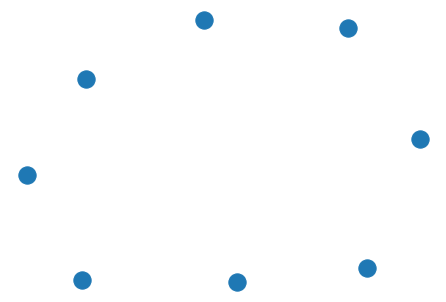

In [7]:
nx.draw(bestguess)

In [8]:
data = df.to_numpy()
instances = {}
for count, label in enumerate(df.columns):
    instances[label] = max(data[:,count])
    
print(instances)

{'age': 3, 'portembarked': 3, 'fare': 3, 'numparentschildren': 3, 'passengerclass': 3, 'sex': 2, 'numsiblings': 3, 'survived': 2}


In [9]:

def updatecounts(counts, bestguess,thenode):
    x = [thenode]
    
    for node in x: 
        counts[node] = []
        parents = [pred for pred in bestguess.predecessors(node)] 
        #print(parents)
        pcount = 0
        if len(parents) == 0: 
            counts[node].append(np.zeros(instances[node]))
            for i in range(len(df)):
                counts[node][0][df.iloc[i][node]-1] += 1
            continue
        pdic = {}
        pcount = 0


        for i in range(len(df)):
            pinlist = []
            for parent in parents:
                pinlist.append(df.iloc[i][parent])
            pinstantiation = tuple(pinlist)    
            #print(pinstantiation)

            if pinstantiation not in pdic:
                pdic[pinstantiation] = pcount
                pcount += 1
                counts[node].append(np.zeros(instances[node]))
                #print(counts[node])

            #print(pdic[pinstantiation])
            counts[node][pdic[pinstantiation]][df.iloc[i][node]-1] += 1

    return(counts)




In [10]:
def initcounts(bestguess):
    counts = {}
    for node in bestguess: 
        counts[node] = []
        parents = [pred for pred in bestguess.predecessors(node)] 
        #print(parents)
        pcount = 0
        if len(parents) == 0: 
            counts[node].append(np.zeros(instances[node]))
            for i in range(len(df)):
                counts[node][0][df.iloc[i][node]-1] += 1
            continue
        pdic = {}
        pcount = 0


        for i in range(len(df)):
            pinlist = []
            for parent in parents:
                pinlist.append(df.iloc[i][parent])
            pinstantiation = tuple(pinlist)    
            #print(pinstantiation)

            if pinstantiation not in pdic:
                pdic[pinstantiation] = pcount
                pcount += 1
                counts[node].append(np.zeros(instances[node]))
                #print(counts[node])

            #print(pdic[pinstantiation])
            counts[node][pdic[pinstantiation]][df.iloc[i][node]-1] += 1

    return(counts)



In [11]:
print(counts)

NameError: name 'counts' is not defined

In [12]:
def bayesian_score(bestguess,counts): 
    score = 0 
    for node in bestguess: 
        npinstance = len(counts[node])
        for row in range(npinstance): 
            score += (scipy.special.loggamma(instances[node]) - (scipy.special.loggamma(instances[node] + sum(counts[node][row])))) 
            score += sum([scipy.special.loggamma((1+counts[node][row][r]) - scipy.special.loggamma(1)) for r in range(instances[node])])
    return(score)


In [13]:
def rand_neighbor(G):
    newgraph = copy.deepcopy(G)
    samplenodes = random.sample(list(G.nodes()), 2)
    
    if G.has_edge(samplenodes[0],samplenodes[1]): 
        newgraph.remove_edge(samplenodes[0],samplenodes[1])
    else: 
        newgraph.add_edge(samplenodes[0],samplenodes[1])
        
    return((newgraph, samplenodes[1]))
        

In [14]:
list(bestguess.nodes)

['age',
 'portembarked',
 'fare',
 'numparentschildren',
 'passengerclass',
 'sex',
 'numsiblings',
 'survived']

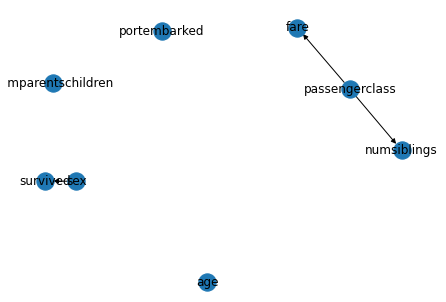

In [21]:
bestguess = nx.DiGraph()
for label in df.columns:
    bestguess.add_node(label)
#bestguess.add_edge("alcohol", "ph")
#bestguess.add_edge("citricacid", "ph")
#bestguess.add_edge("fixedacidity", "ph")
bestguess.add_edge("sex", "survived")
bestguess.add_edge("passengerclass","fare")
###bestguess.add_edge("passengerclass","portembarked")
bestguess.add_edge("passengerclass","numsiblings")
#bestguess.add_edge("passengerclass","age")
#bestguess.add_edge("passengerclass","numparentschildren")###

#for node in bestguess.nodes(): 
    #if node != "sex": 
        #bestguess.add_edge(node, "sex")
        
nx.draw(bestguess,with_labels = True)

In [27]:
k_max = 100
def localgraphsearch(G):
    counts = initcounts(G)
    currscore = bayesian_score(G, counts) 
    for i in range(k_max): 
        #print(i)
        tup = rand_neighbor(G)
        Gprime = tup[0]
        augnode = tup[1]
        #nx.draw(Gprime)
        if not(nx.is_directed_acyclic_graph(Gprime)):
            continue
        #print("passed the point of no return")
        countsprime = copy.deepcopy(counts)
        updatecounts(countsprime,Gprime,augnode)
        nextscore = bayesian_score(Gprime,countsprime)
        
        if nextscore > currscore: 
            #print("I reign")
            print(nextscore)
            currscore = nextscore 
            counts = copy.deepcopy(countsprime)
            G = copy.deepcopy(Gprime)
    
    return G

In [23]:
answer = localgraphsearch(bestguess)

0
1
-4017.354970040638
2
-3980.602164453055
3
4
5
6
7
-3957.6228836467576
8
9
10
11
12
-3955.807232206865
13
-3952.5430410751646
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
-3902.851792566855
32
33
34
-3888.3871731965683
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
-3887.8666174400423
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
-3851.687058650874
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
-3847.896275222505
98
99


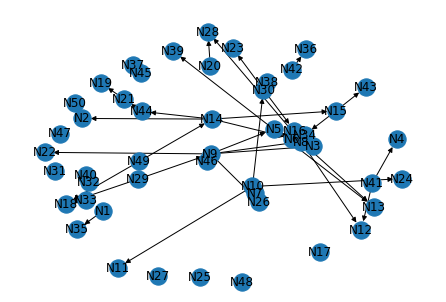

In [85]:
nx.draw(answer,with_labels = True)

In [63]:
bayesian_score(answer, initcounts(answer))

-43256.494213249534

In [26]:
bestguesses = [nx.DiGraph() for i in range(10)]
for i in range(10):
    for label in df.columns:
        bestguesses[i].add_node(label)

answers = []
for i in range(10):
    answers.append(localgraphsearch(bestguesses[i]))


0
1
-4131.477445073528
2
-4123.58556368356
3
-4120.831528332293
4
5
-4109.567305192963
6
7
-4056.1258797432383
8
9
-4052.6952703653387
10
11
12
-3918.6153761125424
13
14
15
16
-3917.9197771937215
17
18
19
20
21
-3901.6554089203855
22
23
24
-3882.223118851909
25
-3881.5166093599855
26
27
-3873.2494772982136
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
-3861.437195184173
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
-3859.621543744279
91
92
93
94
95
96
97
98
99
0
1
-4151.761239414618
2
3
-4143.236229420696
4
-4139.445445992324
5
6
-4087.6631237160345
7
-4077.101032015178
8
-3944.505410229256
9
-3921.5261294229604
10
11
12
13
14
-3918.77209407169
15
16
17
18
19
20
21
22
23
24
-3914.66174259057
25
-3900.007541498337
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
-3899.4312732723724
53
54
55
56
57
58
59
60
61
-3862.6784676847897
62
-3825.0740543084617
63
64
65


In [28]:
for g in answers: 
    counts = initcounts(g)
    print(bayesian_score(g, counts))

-3859.621543744279
-3815.0937770168994
-3834.7326197613093
-3864.696676019649
-3954.1939893622266
-3831.5058858249745
-3865.2541132597357
-3827.7916303178026
-3840.8569633035468
-3865.582182886261


In [25]:
print(answers)

NameError: name 'answers' is not defined

In [31]:
nx.readwrite.adjlist.write_adjlist(answers[2], "small.gph", "test.adjlist")

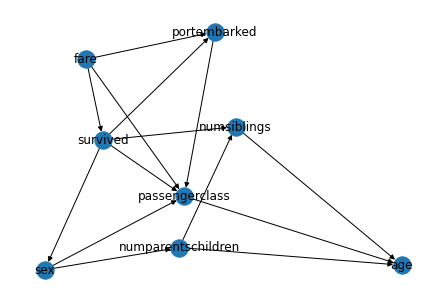

In [32]:
nx.draw(answers[2],with_labels = True)
